<a href="https://colab.research.google.com/github/rlaxogud0909/python-stock-data-analysis/blob/main/%EC%A6%9D%EA%B6%8C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install html5lib

In [ ]:
import pandas as pd
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13')[0]
df['종목코드'] = df['종목코드'].map('{:06d}'.format) # ex) 20를 6자리로 000020으로 출력하기 위해
df = df.sort_values(by='종목코드')
df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
954,동화약품,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,유준하,http://www.dong-wha.co.kr,서울특별시
318,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,노성석,http://www.krmotors.com,경상남도
1579,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
1601,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
1604,삼양홀딩스,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 윤재엽",http://www.samyang.com,서울특별시
...,...,...,...,...,...,...,...,...,...
419,SNK,950180,소프트웨어 개발 및 공급업,"IP 라이센스, 콘솔, 모바일 게임",2019-05-07,07월,"갈지휘, 마츠바라 켄지",http://www.snk-corp.co.jp,일본
1705,미투젠,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,린즈웨이/라우호밍,http://www.me2zen.com,홍콩
1099,소마젠,950200,"그외 기타 전문, 과학 및 기술 서비스업","유전체 분석 서비스 (NGS, CES 등)",2020-07-13,12월,Ryan W. Kim (김운봉),http://psomagen.com,미국
1950,프레스티지바이오파마,950210,자연과학 및 공학 연구개발업,바이오시밀러 및 항체의약품 신약,2021-02-05,06월,박소연,http://www.prestigebiopharma.com,싱가포르


In [ ]:
!pip install beautifulsoup4
!pip install lxml

In [ ]:
# find_all() vs find()
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen, Request

url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1'

req = Request(url)
print(req.headers) # 헤더가 없음
req.add_header('User-Agent', 'Mozilla/5.0') # 해더 정보에 User-Agent 정보 추가
print(req.headers)

with urlopen(req) as doc:
  html = bs(doc, 'lxml')
  # print(html)
  pgrr = html.find('td', class_='pgRR')
  print(pgrr)
  print(pgrr.a['href'])

{}
{'User-agent': 'Mozilla/5.0'}
<td class="pgRR">
<a href="/item/sise_day.naver?code=068270&amp;page=411">맨뒤
				<img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
</a>
</td>
/item/sise_day.naver?code=068270&page=411


In [ ]:
# 위 코드 수정
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

# 4.4.3 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1] 

In [ ]:
print(pgrr.prettify())
print(pgrr.text)

<td class="pgRR">
 <a href="/item/sise_day.naver?code=068270&amp;page=411">
  맨뒤
  <img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
 </a>
</td>


맨뒤
				




In [ ]:
# 4.4.4 전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

In [ ]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.03.02,160000.0,500.0,159500.0,163000.0,159000.0,117356.0
2,2022.02.28,159500.0,4000.0,154500.0,159500.0,153500.0,382197.0
3,2022.02.25,155500.0,4500.0,154000.0,155500.0,152500.0,406851.0
4,2022.02.24,151000.0,9500.0,157000.0,157500.0,150000.0,777354.0
...,...,...,...,...,...,...,...
10,2005.07.22,5580.0,160.0,5850.0,5850.0,5530.0,69921.0
11,2005.07.21,5740.0,810.0,6450.0,6580.0,5730.0,182685.0
12,2005.07.20,6550.0,1150.0,7690.0,7690.0,6550.0,422688.0
13,2005.07.19,7700.0,2500.0,6700.0,7700.0,6510.0,499088.0


In [2]:
!pip install mplfinance

     |████████████████████████████████| 70 kB 3.6 MB/s 


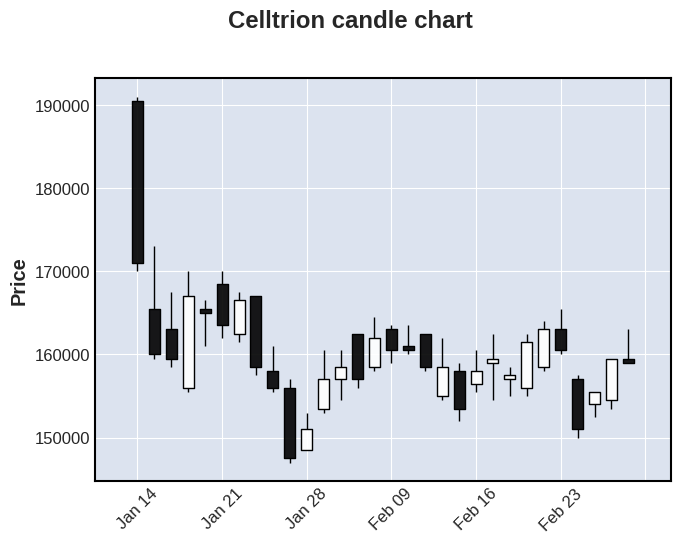

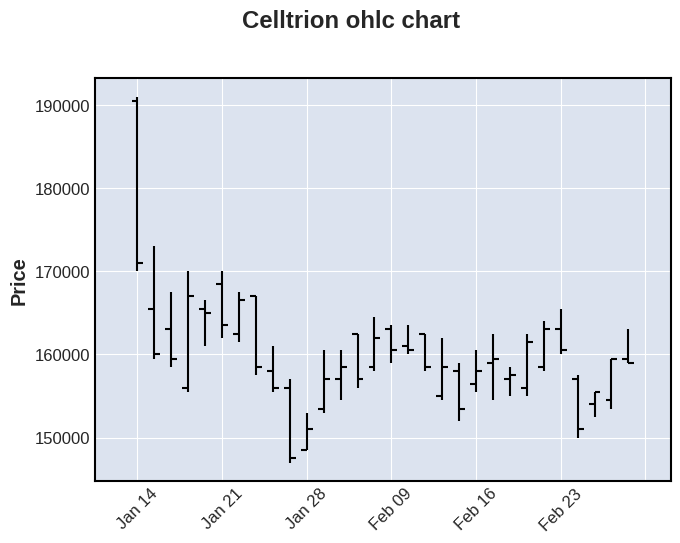

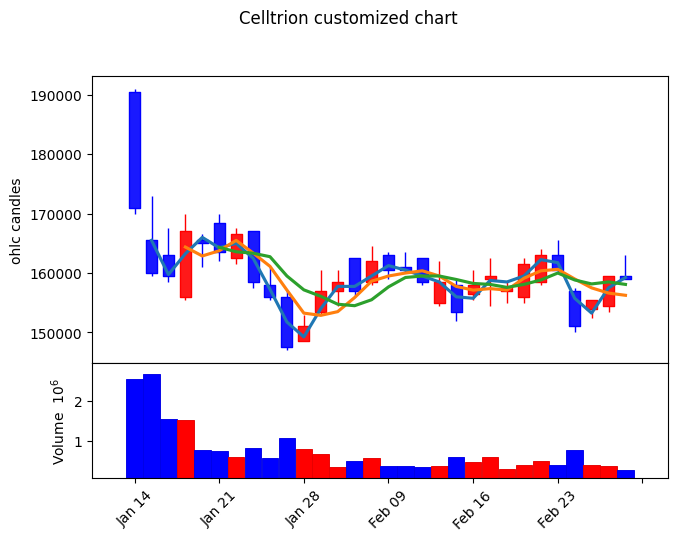

In [6]:
import pandas as pd
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import mplfinance as mpf

url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
with urlopen(url) as doc:
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    bs = BeautifulSoup(html, 'lxml')
    pgrr = bs.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]  

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

df = df.dropna()
df = df.iloc[0:30]
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 1
mpf.plot(df, title='Celltrion candle chart', type='candle')

# 2
mpf.plot(df, title='Celltrion ohlc chart', type='ohlc')

# 3
kwargs = dict(title='Celltrion customized chart', type='candle',
    mav=(2, 4, 6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)